In [3]:
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)
import plotly.graph_objs as go
import pandas as pd
from pathlib import Path
import os

from openalea.mtg.algo import split, orders, union
from openalea.mtg.io import read_mtg_file, write_mtg

from openalea.strawberry.import_mtgfile import import_mtgfile
from openalea.strawberry.analysis import extract_at_plant_scale, extract_at_node_scale, extract_at_module_scale, df2waffle, plot_waffle, plot_pie 


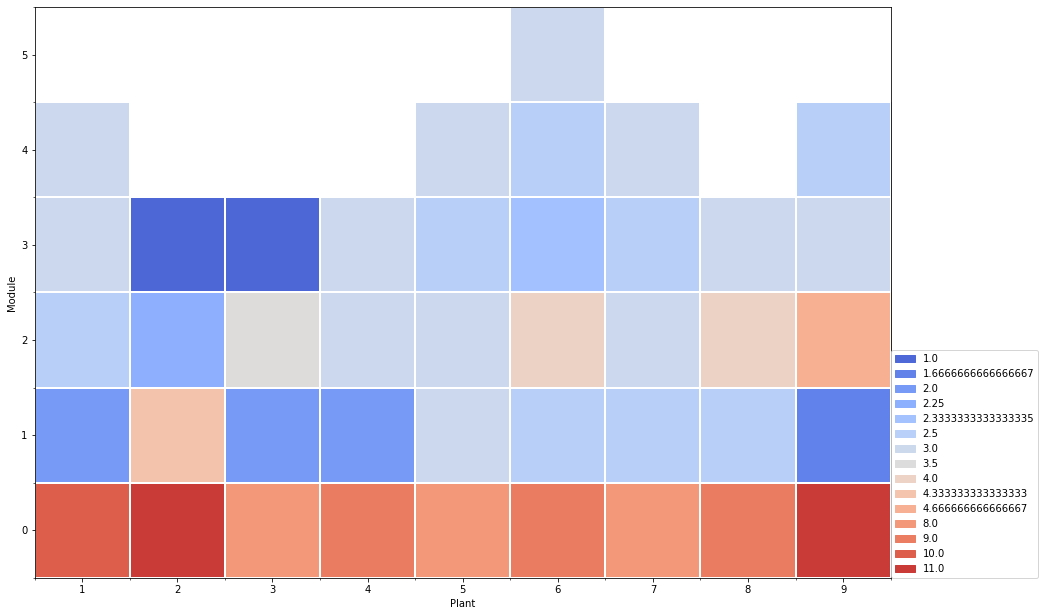

In [4]:
mtg1 = import_mtgfile(filename= ["Gariguette"])

df = extract_at_module_scale(mtg1)

date = df['date']
variable = 'nb_visible_leaves' # quantitative variable example: nb_visible_leaves
aggfunc = "mean" # quantitative: "mean", "median" | qualitative: lambda x: ' '.join(x)

tmp=df2waffle(df, index='order', 
              date=date[len(date)-1], 
              variable=variable, 
              aggfunc=aggfunc,
              crosstab=False)

yticks_l =list(range(0,len(tmp.index)))
yticks_l.reverse()

layout={
    'xlabel': 'Plant',
    'xticks': range(0,len(tmp.columns)),
    'xticks_label': tmp.columns,
    'ylabel': 'Module',
    'yticks': range(0,len(tmp.index)),
    'yticks_label': yticks_l,
}


fig = plot_waffle(tmp,
                  layout=layout,
                  plot_func='matplotlib')
# fig